# The modular curves as moduli space of LG theories

In this notebook we are going to show, with concrete and computable examples, the geometry of the parameter space of a Landau-Ginzburg supersymmetric model.

## Introduction

Let us consider a supersymmetric 2D LG model defined by a superpotential $W_\tau(z)$.

Its Lagrangian is:

$$L_\tau=\int d\theta^4 K + \int d\theta^2 W_\tau + \int d\bar \theta^2 W_\tau^\dagger.$$

The first term is a Kahler potential $K$ over the space $X$ defined by the coordinates $z$.

$z$ is the spatial variable while $\tau$ a parameter of the theory. In the LG model, $z$ are promoted to chiral superfields.

The variable $z$ has to live on a Stein manifold. Stein manifolds have exhaustions (basically a Morse functions) and they can provide the Kahler potentials $K$. Let $X$ be a connected, non-compact Riemann surface. A deep theorem of Heinrich Behnke and Stein (1948) asserts that $X$ is a Stein manifold. Hence, a torus with a defect in one point (divisor) would do the job! We will see later that elliptic curves with defects would be the focus of the next sections.

Out of the data $(X, W)$, we can construct two related 4-susy LG theories: a two-dimensional (2, 2) QFT and a one-dimensional 4-supercharges supersymmetric Quantum Mechanical (SQM) system, the latter being the dimensional reduction of the first one by compactification on a circle $S^1$.

For a fixed parameter $\tau$, the Spectrum as well as the eigenstates of the Hamiltonian can be computed.

The idea of *$tt^*$ geometry* is to study how the space of vacua changes when the parameters of the theory are modified.


## Chiral ring

In a general LG theory in 2D, vacua are labelled by the critical points fo the superpotential $W_\tau(z)$:
$$\partial_{z}W_\tau(z^*) = 0, \ z^* \ vacuum.$$

Depending on whether they are isolated, or there is only one "multiple" vacuum $z^*$, we speak about a massive theory or a gapless (super-conformal) one.

Chiral operators, in general, are operators $O$ such that $[\bar Q,O]=0$, where $Q$ is the SUSY charge.

For a generic choice of the parameters defining $W_\tau(z)$, the classical vacua are isolated, i.e. the theory is massive, and the elements in the chiral ring are identified with their set of values at the critical points. Let's assume that $\tau$ is a vector parameter of our superpotential. Let $\Phi_i$ be the chiral operators. 

These operators act on a "canonical" vacuum states as $\Phi_i |0> = |i>$ and they are in 1:1 correspondence with those stable states $|i>$ that minimise the energy (called BPS states). Also, for a fixed choice of $\tau$, they form a ring, called the *Chiral ring* 

$$R_{\tau} = \frac{\mathbb C[z_i]}{\partial_{z^i}W_{\tau}(z)}.$$

### Example 1

Let $z \in \mathbb C = X$ following the previous notation. Let $\tau = (\tau_1,\tau_2, \tau_3) \in \mathbb C^3$. 



In [1]:
R.<z, t1, t2, t3> = PolynomialRing(CC)
R.gens()

(z, t1, t2, t3)

Let's conside the following superpotential:

In [2]:
# Superpotential
W = t1*(z^3 - 3*z*t3)/2 + t2

In [3]:
# Derivative
dW = W.derivative(z)
print(dW)
# Ideal associated to it
I = Ideal([dW])

1.50000000000000*z^2*t1 + (-1.50000000000000)*t1*t3


In [5]:
x = var('x')
solve(1.50000000000000*x^2*t1 + (-1.50000000000000)*t1*t3 == 0, x)

[x == -sqrt(t3), x == sqrt(t3)]

The vacua are found from $\partial_z W_\tau(z)=\tau_1(3z^2 − 3\tau_3)/2 = 0$, i.e. $z^* = \pm \sqrt{\tau_3}$. Hence the theory is massive iff $\tau_3\neq 0$ and superconformal otherwise: the mass is related to the gap between different stable local vacua. We also see that the vacua do depend on the parameter $\tau_3$: hence, we expect that moving around the space of parameters will lead us to special points where the physics is described by a SCFT.


In [6]:
# Chiral ring
Chiral_Ring = R.quotient(I)
# Generators
Chiral_Ring.gens()

(zbar, t1bar, t2bar, t3bar)

In [7]:
# Double check
Chiral_Ring.Element(Chiral_Ring, t1*(3*z^2 - 3*t3))

0

The *chiral ring* is 
$$R_\tau=\frac{\mathbb C[z]}{(\tau_1(3z^2-3\tau_3)/2)},$$

To spell out the ring exactly, we have to differentiate some cases:
 1. $\tau_1 = 0$, the chiral ring is $R_\tau = \mathbb C[z] = <1,z,z^2,...>$
 2. $\tau_1 \neq 0$ and $\tau_3 =0$, $R_\tau = \mathbb C[z]/(z^2) = <1,z>$
 3. $\tau_1 \neq 0$ and $\tau_3 \neq 0$, $R_\tau = \mathbb C[z]/(z^2-\tau_3) = <1,z>$

## Modular curves and $tt^*$

Let us consider the following 2D Landau-Ginzburg model defined by the superpotential

$$W_\tau (z) = \sum_{\zeta \in \Delta} e^{2\pi i k(\xi)/N} log(z − \zeta)$$

that has derivative

$$\partial_zW_\tau(z) := \sum_{\zeta \in \Delta}\frac{e^{2\pi i k(\zeta)/N}}{z-\xi},$$

where $L_\tau := \mathbb Z \oplus \tau\mathbb Z$ and $\Delta = \mathbb Z_N \otimes L_\tau$, meaning that inside an elemetary cell defined by $L_\tau$, there are $N$ defects, all aliged along one of the edges of the unit cell. By periodicity, this pattern is repeated over all cells. $k(\zeta) \in \mathbb Z_N$ and corresponds to the number of the defect inside the unit cell. 

In this model, this part of the superpotetial models the magnetic field:

$$\sum_{\zeta \in L_\tau}\frac{1}{z-\zeta}$$

### Parameters and moduli space

The parameters of this theory are $\tau$ of $L_\tau$. The value of $\tau \in \mathbb H$ lives in the upper half complex plane. The symmetry group of symmetry of such lattices is $\Gamma_1(N)$.

The moduli space is then $Y(N) = \mathbb H/\Gamma_1(N)$. Its compactification, obtained by adding the rational points along the real axis and infinity (i.e. $\mathbb P(\mathbb Q)$), is $X(N)=\bar{\mathbb H}/\Gamma_1(N)$.

In [8]:
# the modular curve with N=11
Y1N = AbelianVariety(Gamma1(11))
Y1N.elliptic_curve()


Elliptic Curve defined by y^2 + y = x^3 - x^2 - 10*x - 20 over Rational Field

In [9]:
# its compactification
X1N = J1(11)
X1N.elliptic_curve()

Elliptic Curve defined by y^2 + y = x^3 - x^2 - 10*x - 20 over Rational Field

### Cusps as SCFT

The cusps of the modular curve (a.k.a. the moduli space) are the points on $\mathbb P(\mathbb Q)$ where the model degenrates, meaning that the vacua are not isolated anymore. This corresponds to a theory thatt becomes massless! Hence a conformal field theory.

In [10]:
X1N.cuspidal_subgroup()  # The cuspidal subgroup of J0(N) is the finite torsion group 
                         # generated by all classes of differences of cusps on X0(N)

Finite subgroup with invariants [25] over QQ of Abelian variety J1(11) of dimension 1

In [11]:
X1N.cuspidal_subgroup().gens()

[[(1/25, 12/25)]]

In [12]:
X1N.cuspidal_subgroup().order()

25

Let's plot the moduli space of the theory on the upper half plane. Let's identify the boundaries that are to be glued together with the same color. The cusps appear to be -- as expected -- on the real axis.

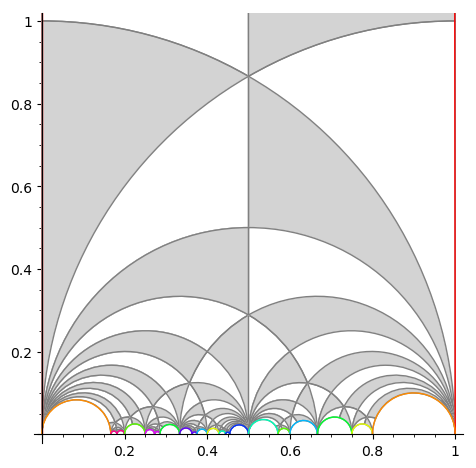

In [13]:
fs = FareySymbol(Gamma1(11))
fs.fundamental_domain()

In [14]:
fs.cusps()  # the cusps are the points where the theory is super-conformal

[0, 1/6, 2/11, 1/4, 3/11, 1/3, 4/11, 4/9, 5/11, Infinity]

In [15]:
fs.genus()  # genus of the abelian varity

1

In [16]:
H_1 = X1N.integral_homology(); H_1  # homology over C

Integral Homology of Abelian variety J1(11) of dimension 1

In [17]:
assert 2*fs.genus() == H_1.dimension()

## Spectral covering

The moduli space $X_1(N)$ discussed so far is the moduli space of the Landau-Gizburg theory. If we consider the pair LG theroy and a selected vacuum, we expect the moduli space of these pairs to cover the original moduli space $N:1$, where $N$ is the number of vacua.
    
This is well known in the theory of modular curves, and it leads to the curves $X(N) := \bar{\mathbb H}/\Gamma(N)$:

$$X(N) \to X_1(N) : z^N \mapsto z$$


In [18]:
g = Gamma(11)
g1 = Gamma1(11)
g.is_subgroup(g1)

True

In [19]:
g.is_normal()

True

Let us ow see whart is the group index $[\Gamma_1(N):\Gamma(N)]$: this gives us the coverig map index as well.

In [20]:
print("[Gamma1(11): Gamma(11)] =", g.index()/g1.index())

[Gamma1(11): Gamma(11)] = 11


In [21]:
# Define X(N)
XN = g.modular_abelian_variety()
XN

Abelian variety  of dimension 26

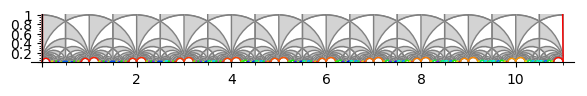

In [22]:
fs2 = FareySymbol(Gamma(11))
fs2.fundamental_domain()

From the picture above, we clearly see that the moduli space of $X(N)$ is $N$ times the one of $X_1(N)$, hence making the covering map clear and explicit.

In [23]:
print(fs2.cusps())

[0, 1/6, 2/11, 1/5, 1/4, 3/11, 2/7, 1/3, 4/11, 3/8, 2/5, 3/7, 4/9, 5/11, 1/2, 5/9, 4/7, 3/5, 5/8, 2/3, 5/7, 3/4, 4/5, 5/6, 1, 5/4, 9/7, 4/3, 11/8, 7/5, 13/9, 3/2, 14/9, 11/7, 8/5, 13/8, 5/3, 12/7, 9/5, 11/6, 2, 7/3, 19/8, 22/9, 5/2, 23/9, 18/7, 17/6, 3, 10/3, 31/9, 4, 40/9, 5, 6, 7, 8, 9, 10, Infinity]


In [24]:
fs2.genus()

26

In [25]:
H_1 = XN.integral_homology(); H_1  # homology over C

Integral Homology of Abelian variety  of dimension 26

In [26]:
assert 2*fs2.genus() == H_1.dimension()

In [27]:
# Unfortunately this XN.hom(X1N) is not yet implemented and we do not get the equation explicitly